In [6]:
from pylab import *
from scipy.integrate import* #utilizar este paquete para todo menos para algo mas especifico
%matplotlib inline

In [185]:
def Energia(x_p,a):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    E=0.5*(px*px*(1.+a)+py*py)-((1.+a)/sqrt(x**2+y**2))
    return E

def L_z(x_p):
    x,y,px,py=x_p[:,0],x_p[:,1],x_p[:,2],x_p[:,3]
    L=x*py-y*px
    return L

In [21]:
def ec_mov(x_p,t,a=0):
    #x_p representa x,y,px,px
    r3_2=(x_p[0]**2+x_p[1]**2)**(1.5)
    desv=1.+a
    dx=x_p[2]*desv
    dy=x_p[3]
    dpx=-(x_p[0]*desv)/r3_2
    dpy=-(x_p[1]*desv)/r3_2
    return array([dx,dy,dpx,dpy])

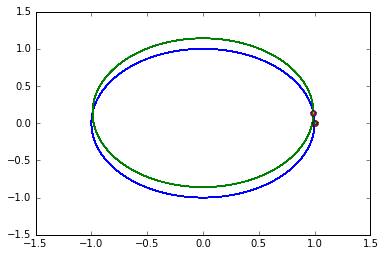

In [256]:
t=linspace(0,2*pi*50,5000)
alfa=(0.0)
sol=odeint(ec_mov,[1,0,0,1],t,args=(alfa,),rtol=1e-15) #odeint integra sin los intervalos entre los puntos intermedios (pasos mo uniformes)
sol2=odeint(ec_mov,[0.99,sqrt(1-.99**2),0,1],t,args=(alfa,),rtol=1e-15)
plot(sol[:,0],sol[:,1])
plot(sol2[:,0],sol2[:,1])
plot(sol[-1,0],sol[-1,1],'o'),plot(sol[0,0],sol[0,1],'*')
plot(sol2[-1,0],sol2[-1,1],'o'),plot(sol2[0,0],sol2[0,1],'*')
show()

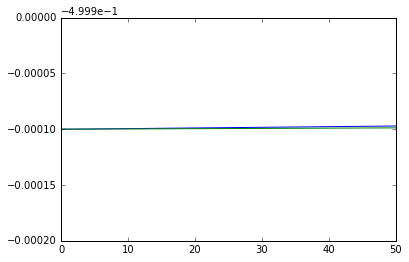

In [257]:
E=Energia(sol,alfa)
E2=Energia(sol2,alfa)
ylim([E[0]-.0001,E[0]+.0001])
plot(t/(2*pi),E)
plot(t/(2*pi),E2)
show()

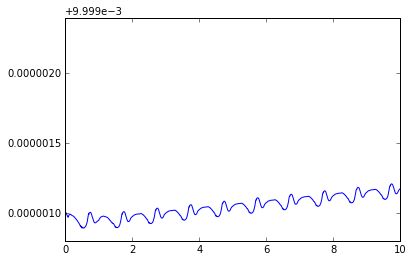

In [258]:
L=L_z(sol)
L2=L_z(sol2)
xlim([0,10])
#ylim([L[0]-.01,L[0]+.01])
#plot(t/(2*pi),L)
#plot(t/(2*pi),L2)
plot(t/(2*pi),L-L2)
show()

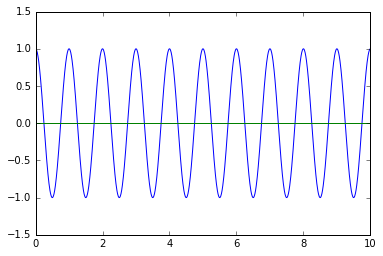

In [259]:
xlim([0,10])
plot(t/(2*pi),sol[:,0])
plot(t/(2*pi),50*(L-1))
show()